In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

np.random.seed(42)

n_features_dataset1 = 30
n_features_dataset2 = 50
n_shared_global_dimensions = 5
n_shared_local_dimensions_dataset1 = 5
n_shared_local_dimensions_dataset2 = 5
n_samples = 5000

global_weight_sparsity_level = .9
global_signal_sparsity_level = .7

z_g = np.random.randn(n_samples, n_shared_global_dimensions)
z_g_zero_mask = np.random.rand(n_samples, n_shared_global_dimensions)
z_g_zero_mask[z_g_zero_mask < global_signal_sparsity_level] = 0.
# Dataset 1 global effect
C_g1 = np.random.rand(n_shared_global_dimensions, n_features_dataset1)
C_g1[C_g1 < global_weight_sparsity_level] = 0.
C_g1 = C_g1 * 2 # arbitrarily scaling the weights, just because why not..
dataset1_global_effect = ((elu(z_g) + 1) * z_g_zero_mask) @ C_g1
# Dataset 2 global effect
C_g2 = np.random.rand(n_shared_global_dimensions, n_features_dataset2)
C_g2[C_g2 < global_weight_sparsity_level] = 0.
C_g2[:, n_features_dataset2//2:] = C_g2[:, n_features_dataset2//2:] * 4 # arbitrarily scaling half of the weights
dataset2_global_effect = ((elu(z_g) + 1) * z_g_zero_mask) @ C_g2


local_weight_sparsity_level = .9
local_signal_sparsity_level = .7
independent_activity_sparsity_level = .7

# Dataset 1 local effect
C_l1 = np.random.rand(n_shared_local_dimensions_dataset1, n_features_dataset1)
C_l1[C_l1 < local_weight_sparsity_level] = 0.
z_l1 = np.random.randn(n_samples, n_shared_local_dimensions_dataset1)
z_l1_zero_mask = np.random.rand(n_samples, n_shared_local_dimensions_dataset1)
z_l1_zero_mask[z_l1_zero_mask < local_signal_sparsity_level] = 0
dataset1_local_effect = ((elu(z_l1) + 1) * z_l1_zero_mask) @ C_l1
# Dataset 1 independent activity
eps1 = np.random.randn(n_samples, n_features_dataset1)
eps1_zero_mask = np.random.rand(n_samples, n_features_dataset1)
eps1_zero_mask[eps1_zero_mask < independent_activity_sparsity_level] = 0
dataset1_independent_activity = (elu(eps1) + 1) * eps1_zero_mask

# Dataset 2 local effect
C_l2 = np.random.rand(n_shared_local_dimensions_dataset2, n_features_dataset2)
C_l2[C_l2 < local_weight_sparsity_level] = 0.
z_l2 = np.random.randn(n_samples, n_shared_local_dimensions_dataset2)
z_l2_zero_mask = np.random.rand(n_samples, n_shared_local_dimensions_dataset2)
z_l2_zero_mask[z_l2_zero_mask < local_signal_sparsity_level] = 0
dataset2_local_effect = ((elu(z_l2) + 1) * z_l2_zero_mask) @ C_l2
# Dataset 2 independent activity
eps2 = np.random.randn(n_samples, n_features_dataset2)
eps2_zero_mask = np.random.rand(n_samples, n_features_dataset2)
eps2_zero_mask[eps2_zero_mask < independent_activity_sparsity_level] = 0
dataset2_independent_activity = (elu(eps2) + 1) * eps2_zero_mask

dataset1 = dataset1_global_effect + dataset1_local_effect + dataset1_independent_activity
patient1 = dataset1.T

dataset2 = dataset2_global_effect + dataset2_local_effect + dataset2_independent_activity
patient2 = dataset2.T

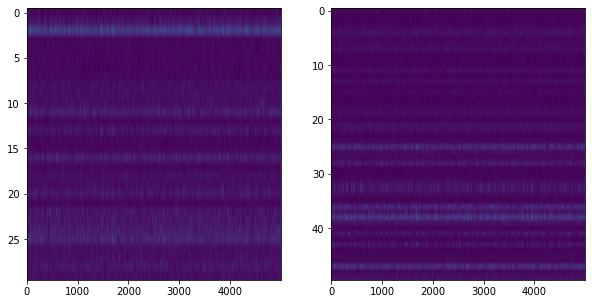

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(patient1, aspect="auto")
ax2.imshow(patient2, aspect="auto")

In [4]:
np.save("fakepatient1.npy", patient1)
np.save("fakepatient2.npy", patient2)